**Sales prediction using python**

In [5]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.shape

(200, 5)

In [9]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
data = df.copy()
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<Axes: >

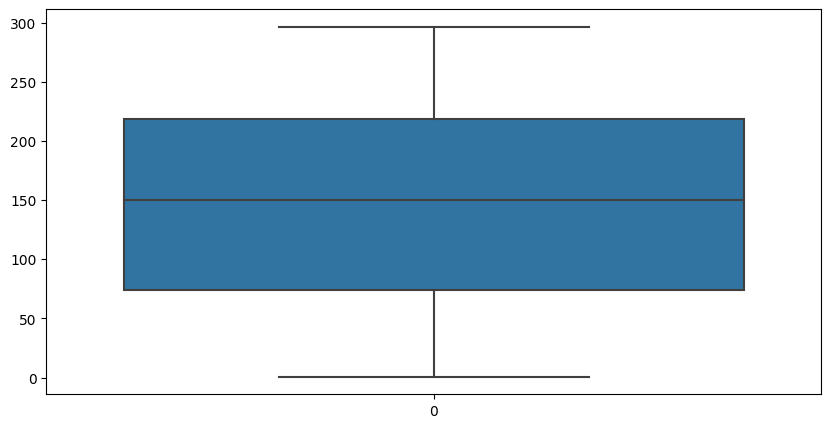

In [14]:
plt.figure(figsize = (10,5))

sns.boxplot(data['TV'])

<Axes: >

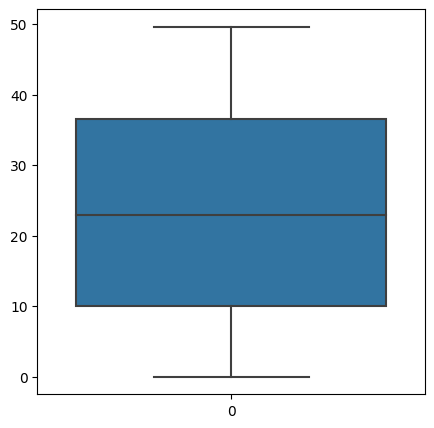

In [15]:
plt.figure(figsize = (5,5))
sns.boxplot(data['Radio'])

<Axes: >

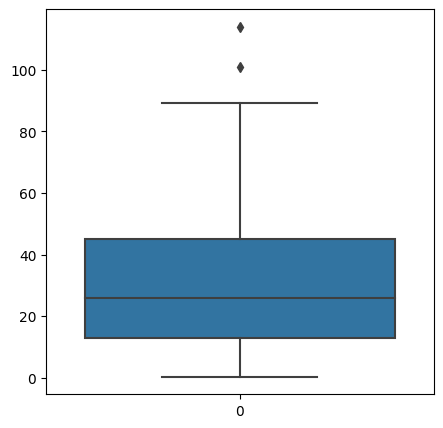

In [16]:
plt.figure(figsize = (5,5))


sns.boxplot(data['Newspaper'])

<Axes: >

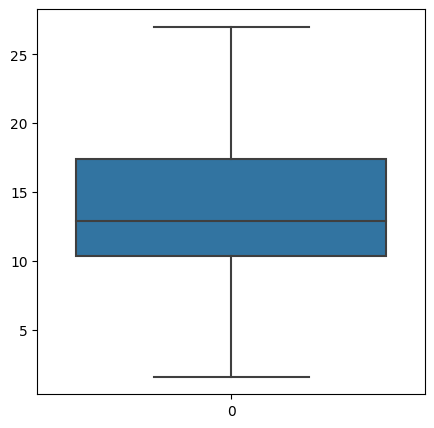

In [17]:
plt.figure(figsize  = (5,5))
sns.boxplot(data['Sales'])

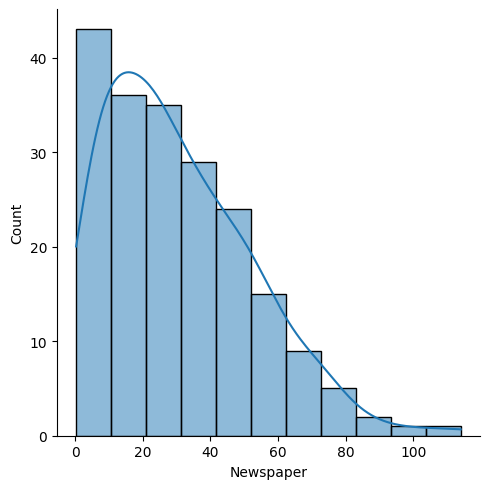

In [18]:
sns.displot(df['Newspaper'],kde = True)

<Figure size 500x500 with 0 Axes>

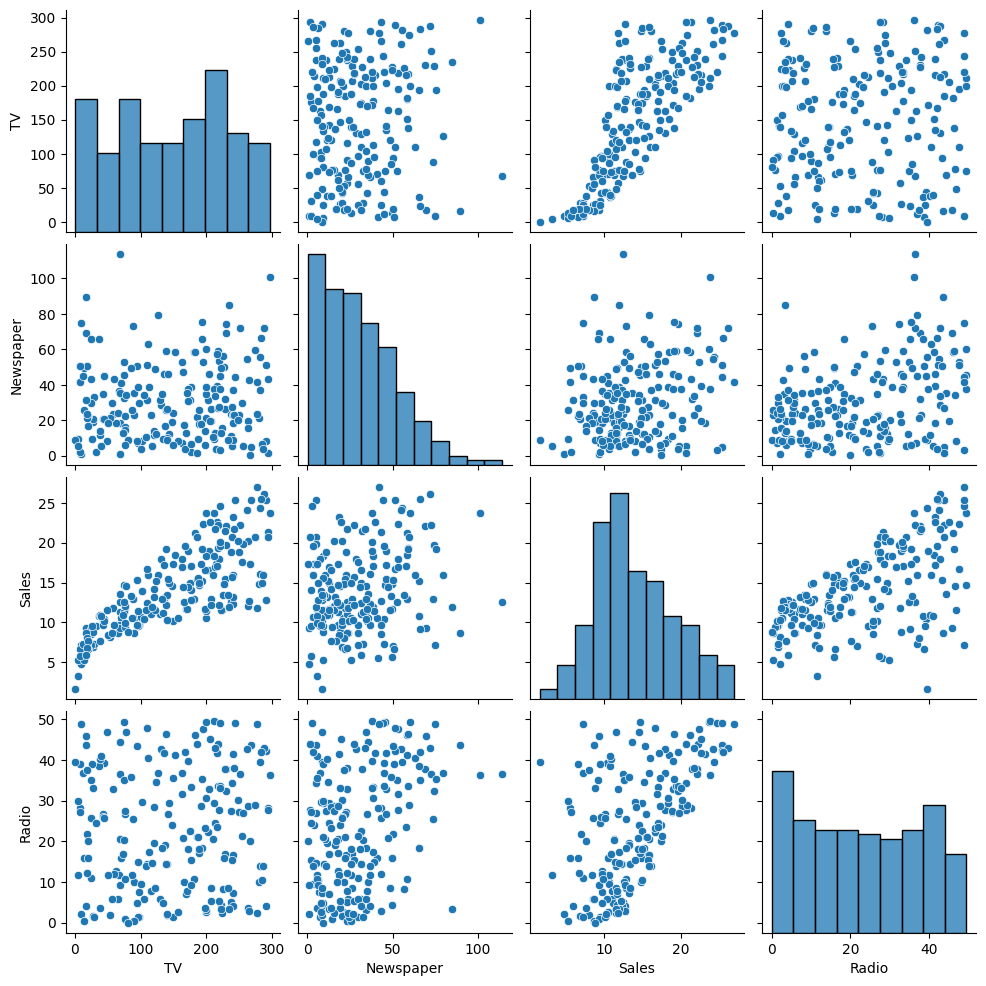

In [19]:
plt.figure(figsize = (5,5))
sns.pairplot(data[['TV','Newspaper','Sales','Radio']],kind = 'scatter')

In [20]:
x = data['TV']
y = data['Sales']
x = x.values.reshape(-1,1)

x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [21]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [22]:
print(x.shape,y.shape)

(200, 1) (200,)


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.33)

In [24]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [25]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score ,GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [26]:
KNN_reg = KNeighborsRegressor().fit(x_train,y_train)
KNN_reg

KNeighborsRegressor()

In [27]:
KNN_reg_train_pred = KNN_reg.predict(x_train)

In [28]:
KNN_reg_test_pred =  KNN_reg.predict(x_test)

In [29]:
print(KNN_reg_train_pred,KNN_reg_test_pred)

[ 7.04 11.1  11.52  4.92 15.14  6.16 15.   15.   20.8  17.56 11.68 13.34
 18.54 14.78 11.62 21.04 18.54 17.78 14.84 17.02 15.9  18.78 15.9   8.8
  7.04  9.66 16.34 16.34  9.18 16.04 10.76  8.08 17.56  7.04 20.7  16.88
 17.54 19.32 14.5   9.8  14.28 18.78 13.56 17.62 15.78 14.78  8.02 20.2
 17.02 11.34 17.02  6.12 21.34 10.18 11.04 20.7  11.62 11.04 21.4   7.04
 17.54 16.4  13.56 15.14 15.38  6.06  8.08 17.04 16.2  12.3   4.92  7.04
 11.1  19.72 10.18 19.32 19.72 21.44  9.68  9.56 13.7  17.04 13.7  17.54
 14.28  9.9  17.54 13.88 11.52 16.88 11.52 17.56 20.   14.5  12.82 14.28
  9.66 19.12  9.98 15.78  9.8  11.22  9.64 12.3   8.02 16.4   9.8   6.06
 19.42 12.3  16.08 15.78 11.22 20.   10.28  9.98 20.7  17.54 15.14 11.22
 11.52 15.9   8.02 20.8  11.22 15.14 11.52  6.06 11.1  12.3  19.42 21.4
 14.5  17.26] [19.32 20.68 20.2  12.3   4.92  9.8  15.78 14.28 15.   14.   10.18  7.04
 21.34 17.54 20.8  15.9   9.72  8.02 13.7  10.8  15.78 13.56 16.   16.4
 18.08 21.04 11.34 11.52 17.28  6.06 16. 

In [30]:
Results = pd.DataFrame(columns = ["Model","Train R2","Test R2","Test RMSE","Variance"])

In [31]:
r2 = r2_score(y_test,KNN_reg_test_pred)
r2_train_score = r2_score(y_train,KNN_reg_train_pred)
mean_squraed = np.sqrt(mean_squared_error(y_test,KNN_reg_test_pred))
variance = r2_train_score - r2
Results  = Results.append({"Model":"K-Nearest-Neighbors","Train R2":r2_train_score,"Test R2":r2,"Test mean_squraed":mean_squraed,"variance":variance},ignore_index = True)
print("R2:",r2)
print("Mean_squared",mean_squraed)

R2: 0.57267929642842
Mean_squared 3.317743848223404


<ipython-input-31-ba621713f8d8>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results  = Results.append({"Model":"K-Nearest-Neighbors","Train R2":r2_train_score,"Test R2":r2,"Test mean_squraed":mean_squraed,"variance":variance},ignore_index = True)


In [32]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance,Test mean_squraed,variance
0,K-Nearest-Neighbors,0.647063,0.572679,NaN,NaN,3.317744,0.074384


In [33]:
import statsmodels.api as stat
x_constanttrain = stat.add_constant(x_train)
model_fit = stat.OLS(y_train,x_constanttrain).fit()
model_fit.params

const    6.928174
x1       0.047401
dtype: float64

In [34]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     201.2
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           2.56e-28
Time:                        08:34:54   Log-Likelihood:                -350.67
No. Observations:                 134   AIC:                             705.3
Df Residuals:                     132   BIC:                             711.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9282      0.572     12.122      0.0

In [35]:
y_train_pred = model_fit.predict (x_constanttrain)
Result = (y_train - y_train_pred)
Result

189   -1.114578
34    -1.964478
86     1.455107
78    -1.884141
9     -5.798953
         ...   
120    1.874023
84     4.651650
169   -5.404362
159   -0.270925
185    5.954561
Name: Sales, Length: 134, dtype: float64

In [36]:
y_train_pred

array([ 7.8145782 , 11.46447792, 10.5448928 ,  7.18414097, 16.39895275,
        7.55387107, 17.38015956, 17.47022202, 20.81201333, 18.29974468,
       14.02888799, 13.33682908, 16.2946699 , 12.76327341, 10.2083436 ,
       18.82115893, 16.2946699 , 18.30922494, 18.04377769, 16.19038705,
       15.83487734, 17.18581425, 15.85857798,  8.42131477,  7.74347625,
        8.96642967, 17.73566927, 17.74988966,  9.75329117, 16.52693625,
       10.72975785,  8.0563248 , 18.29500455,  7.85723936, 20.04411235,
       18.18124145, 19.57957965, 17.28535697, 13.14248377,  9.04701187,
       15.25658154, 17.20477477, 12.66373069, 16.73076181, 14.66880548,
       12.88651678,  8.23170959, 17.10523205, 16.10980485, 10.40742904,
       16.0861042 ,  7.48276913, 20.26689843, 11.68726401, 10.17042257,
       20.0535926 , 11.21325106, 10.09932062, 20.48494439,  7.81931833,
       19.49899745, 17.93001458, 12.62580965, 16.36577184, 14.99587441,
        7.33582512,  8.28385102, 16.86348544, 16.60277832, 13.54

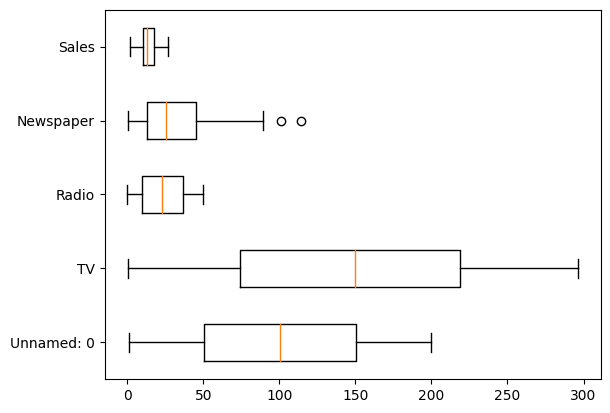

In [37]:
plt.boxplot(df,vert=False,data=df,labels=df.columns)
plt.show()

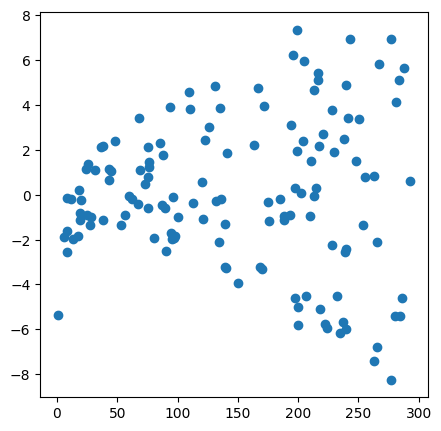

In [38]:
plt.figure(figsize = (5,5))
plt.scatter(x_train,Result)
plt.show()

In [39]:
x_constant = stat.add_constant(x_test)
y_pred = model_fit.predict(x_constant)
y_pred

array([17.28061684, 19.90190846, 17.13841295, 13.53117439,  7.12251929,
        8.80052514, 14.72568703, 15.10489739, 17.47022202, 14.3512168 ,
       11.79628699,  7.8477591 , 20.23371753, 19.3141324 , 20.70773048,
       15.69267345,  9.29823874,  8.19852869, 12.13283619, 10.06139959,
       14.67828573, 12.64003004, 17.63138642, 17.83521199, 16.920367  ,
       18.72161621, 10.46905073, 10.54963293, 15.98656148,  7.27420343,
       17.69774824, 10.63495526,  7.74347625,  9.03753161, 14.10947019,
       10.14198179,  8.11794649,  7.54913094,  9.65374845, 13.70181905,
       14.77782845, 12.48360577, 16.73550194,  7.72925587, 14.02414786,
       20.66032918, 15.58365047, 10.19886334,  7.29790408, 15.31820322,
       13.06190157, 12.42672421, 18.30922494, 17.34697865, 11.88634945,
       15.83013721, 20.97791786, 10.27470542, 15.31820322, 13.91038475,
       18.18124145, 15.49832814, 13.46481258, 12.01907308, 17.3706793 ,
       20.84519423])

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2  = r2_score(y_test,y_pred)
r2

0.6267709238012424

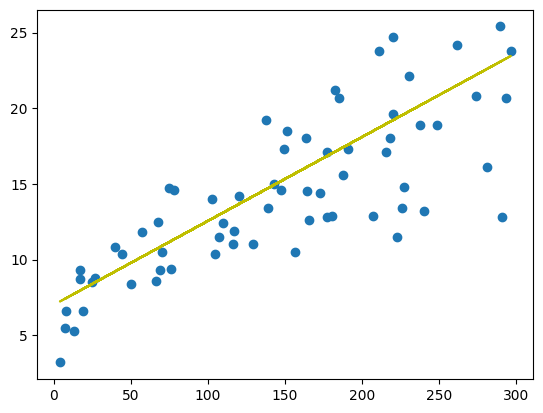

In [41]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7 + 0.0555*x_test,'y')
plt.show()